In [ ]:
#  Implement RNN for sentiment analysis on movie reviews.

In [12]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset (top 10,000 most frequent words)
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to same length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")


x_train shape: (25000, 200), x_test shape: (25000, 200)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    SimpleRNN(128, return_sequences=True),  # First RNN layer
    Dropout(0.3),
    SimpleRNN(64),  # Second RNN layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.5020 - loss: 0.7341 - val_accuracy: 0.5008 - val_loss: 0.6887
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5552 - loss: 0.6885 - val_accuracy: 0.6438 - val_loss: 0.6143
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6838 - loss: 0.5915 - val_accuracy: 0.6350 - val_loss: 0.6370
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7105 - loss: 0.5666 - val_accuracy: 0.7604 - val_loss: 0.5191
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7476 - loss: 0.5185 - val_accuracy: 0.7360 - val_loss: 0.5524


In [20]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7445 - loss: 0.5404
Test Loss: 0.5363, Test Accuracy: 0.7465


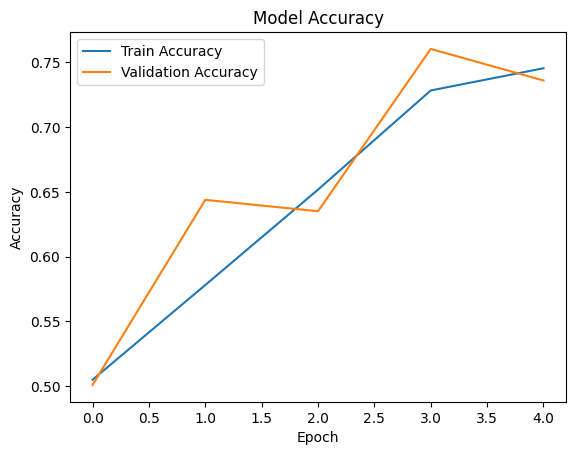

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
word_index = imdb.get_word_index()
reverse_word_index = {value:key for key, value in word_index.items()}

def encode_review(text):
    words = text.lower().split()
    encoded = [word_index.get(word, 2) for word in words]  # 2 = unknown word
    return pad_sequences([encoded], maxlen=maxlen)

sample_review = "The movie was not fantastic! I really hate it."
encoded_review = encode_review(sample_review)
prediction = model.predict(encoded_review)[0][0]

print("Positive" if prediction > 0.5 else "Negative", f"({prediction:.4f})")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Negative (0.4585)
